In [73]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc
from tensorflow import keras
from tensorflow.keras import layers

# **EKPLORASI DATA**

In [3]:
def read_with_sniff(path):
  with open(path, 'r', encoding='utf-8', errors='replace') as f:
    sample = f.read()
    f.seek(0)
    try:
      dialect = csv.Sniffer().sniff(sample, delimiters=[',', ';', '\t', '|'])
      delim = dialect.delimiter
    except Exception:
      delim = ';'

  df = pd.read_csv(path, sep=delim)
  return df, delim

In [4]:
autism, delimiter = read_with_sniff('/content/Autism-Child-Data-Exact.csv')
autism

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'1',b'0',b'0',...,b'm',b'Others',b'no',b'no',b'Jordan',b'no',5.0,b'4-11 years',b'Parent',b'NO'
1,b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'1',b'0',b'0',...,b'm',b'Middle Eastern ',b'no',b'no',b'Jordan',b'no',5.0,b'4-11 years',b'Parent',b'NO'
2,b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'1',b'0',b'0',...,b'm',b'?',b'no',b'no',b'Jordan',b'yes',5.0,b'4-11 years',b'?',b'NO'
3,b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'1',...,b'f',b'?',b'yes',b'no',b'Jordan',b'no',4.0,b'4-11 years',b'?',b'NO'
4,b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',...,b'm',b'Others',b'yes',b'no',b'United States',b'no',10.0,b'4-11 years',b'Parent',b'YES'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',...,b'f',b'White-European',b'yes',b'yes',b'United Kingdom',b'no',10.0,b'4-11 years',b'Parent',b'YES'
288,b'1',b'0',b'0',b'0',b'1',b'0',b'1',b'0',b'0',b'1',...,b'f',b'White-European',b'yes',b'yes',b'Australia',b'no',4.0,b'4-11 years',b'Parent',b'NO'
289,b'1',b'0',b'1',b'1',b'1',b'1',b'1',b'0',b'0',b'1',...,b'm',b'Latino',b'no',b'no',b'Brazil',b'no',7.0,b'4-11 years',b'Parent',b'YES'
290,b'1',b'1',b'1',b'0',b'1',b'1',b'1',b'1',b'1',b'1',...,b'm',b'South Asian',b'no',b'no',b'India',b'no',9.0,b'4-11 years',b'Parent',b'YES'


In [5]:
autism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         292 non-null    object 
 1   A2_Score         292 non-null    object 
 2   A3_Score         292 non-null    object 
 3   A4_Score         292 non-null    object 
 4   A5_Score         292 non-null    object 
 5   A6_Score         292 non-null    object 
 6   A7_Score         292 non-null    object 
 7   A8_Score         292 non-null    object 
 8   A9_Score         292 non-null    object 
 9   A10_Score        292 non-null    object 
 10  age              288 non-null    float64
 11  gender           292 non-null    object 
 12  ethnicity        292 non-null    object 
 13  jundice          292 non-null    object 
 14  austim           292 non-null    object 
 15  contry_of_res    292 non-null    object 
 16  used_app_before  292 non-null    object 
 17  result          

In [6]:
#check nilai kategorikal
count = autism['Class/ASD'].value_counts()
count

,count
Class/ASD,
b'NO',151
b'YES',141


/tmp/ipython-input-3878672959.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  autism_for_corr['age'].fillna(autism_for_corr['age'].median(), inplace=True)


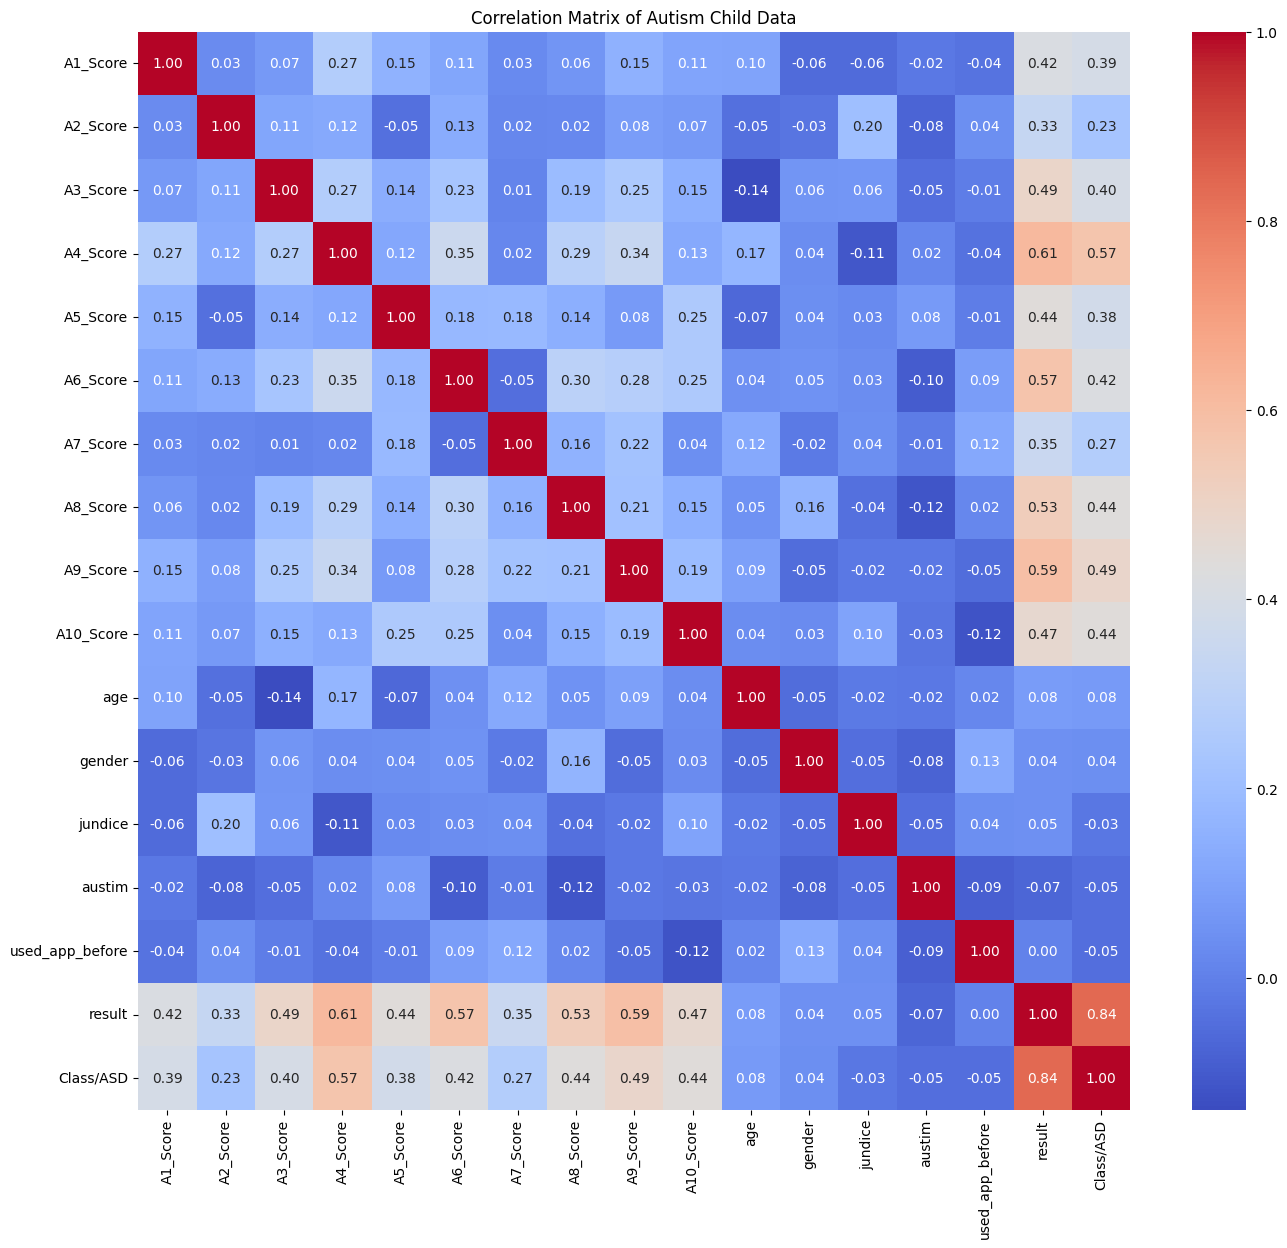

In [7]:
# Grafik Korelasi

# Create a copy for correlation analysis to avoid modifying the original DataFrame
autism_for_corr = autism.copy()

# Remove 'b'' prefix from all object columns and convert to string
for col in autism_for_corr.select_dtypes(include='object').columns:
    autism_for_corr[col] = autism_for_corr[col].astype(str).str.replace("b'", "").str.replace("'", "")

# Convert binary categorical columns to numeric (0/1)
binary_cols_01 = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
                  'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']
for col in binary_cols_01:
    autism_for_corr[col] = pd.to_numeric(autism_for_corr[col])

binary_cols_yesno = ['jundice', 'austim', 'used_app_before']
for col in binary_cols_yesno:
    autism_for_corr[col] = autism_for_corr[col].map({'no': 0, 'yes': 1})

# Handle 'gender' column
autism_for_corr['gender'] = autism_for_corr['gender'].map({'f': 0, 'm': 1})

# Handle 'Class/ASD' (target variable) column
autism_for_corr['Class/ASD'] = autism_for_corr['Class/ASD'].map({'NO': 0, 'YES': 1})

# Handle '?' values in categorical columns and fill 'age' NaNs
for col in ['ethnicity', 'relation']:
    autism_for_corr[col] = autism_for_corr[col].replace('?', np.nan)

autism_for_corr['age'].fillna(autism_for_corr['age'].median(), inplace=True)

# Drop remaining non-numeric categorical columns for correlation heatmap
# (One-hot encoding would create too many columns for a readable heatmap)
autism_for_corr = autism_for_corr.drop(columns=['ethnicity', 'contry_of_res', 'age_desc', 'relation'])

plt.figure(figsize=(16, 14))
sns.heatmap(autism_for_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Autism Child Data')
plt.show()

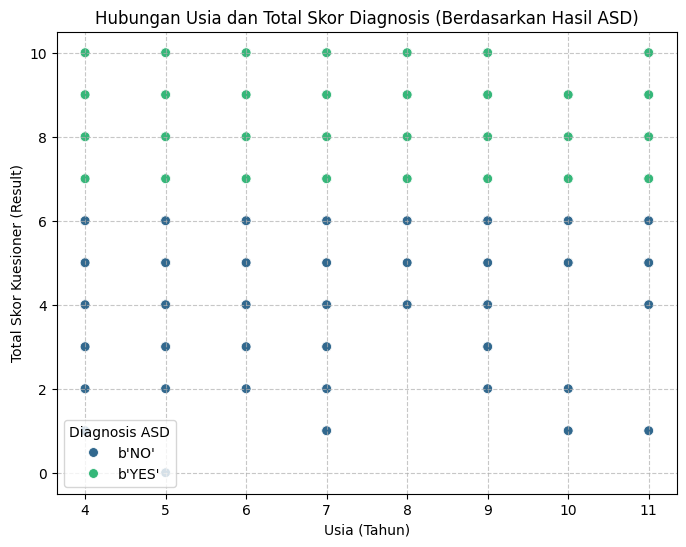

In [9]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='age',          # Sumbu X: Variabel numerik pertama
    y='result',       # Sumbu Y: Variabel numerik kedua
    hue='Class/ASD', data=autism, palette='viridis', s=50
)

plt.title('Hubungan Usia dan Total Skor Diagnosis (Berdasarkan Hasil ASD)')
plt.xlabel('Usia (Tahun)')
plt.ylabel('Total Skor Kuesioner (Result)')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Diagnosis ASD')
plt.show()

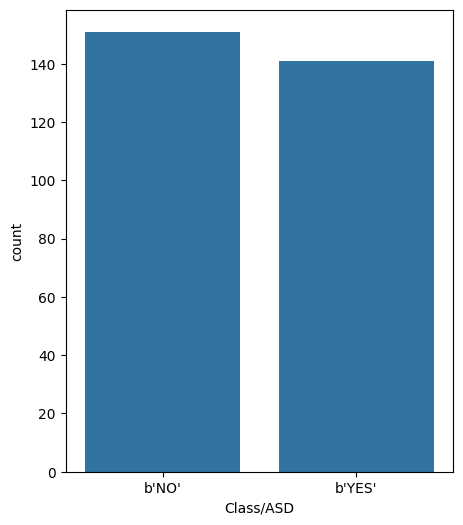

In [10]:
# Bar plot untuk Class/ASD

plt.figure(figsize=(5,6))
sns.countplot(x='Class/ASD', data=autism)
distribusi = autism['Class/ASD'].value_counts()

# **5.1 Data Cleaning**


*   Handling missing values
*   Removing duplicates
*   Handling outliers

In [11]:
# check missing values
missing_count = autism.isna().sum()
print("Jumlah Missing Values: ",missing_count)

# check data duplikat
duplicate_count = autism.duplicated().sum()
print("Jumlah duplikasi ditemukan:", duplicate_count)


Jumlah Missing Values:  A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                4
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64
Jumlah duplikasi ditemukan: 2


In [12]:
import pandas as pd

# Load data
df = pd.read_csv('/content/Autism-Child-Data-Exact.csv')

# 1. Bersihkan missing values pada kolom 'age'
df['age'] = df['age'].fillna(df['age'].median())

# 2. Hapus data duplikat
df = df.drop_duplicates()

# Cek hasil
print("Jumlah data setelah cleaning:", df.shape)
print(df.isna().sum())


Jumlah data setelah cleaning: (290, 21)
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64


In [13]:
missing = df.isna().sum()
print("Jumlah Missing values stelah dibersihkan: ",missing)
duplicate = df.duplicated().sum()
print("Jumlah duplikasi setelah dibersihkan: ", duplicate)

Jumlah Missing values stelah dibersihkan:  A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64
Jumlah duplikasi setelah dibersihkan:  0


In [14]:
len(df)

290

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290 entries, 0 to 291
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         290 non-null    object 
 1   A2_Score         290 non-null    object 
 2   A3_Score         290 non-null    object 
 3   A4_Score         290 non-null    object 
 4   A5_Score         290 non-null    object 
 5   A6_Score         290 non-null    object 
 6   A7_Score         290 non-null    object 
 7   A8_Score         290 non-null    object 
 8   A9_Score         290 non-null    object 
 9   A10_Score        290 non-null    object 
 10  age              290 non-null    float64
 11  gender           290 non-null    object 
 12  ethnicity        290 non-null    object 
 13  jundice          290 non-null    object 
 14  austim           290 non-null    object 
 15  contry_of_res    290 non-null    object 
 16  used_app_before  290 non-null    object 
 17  result           290 

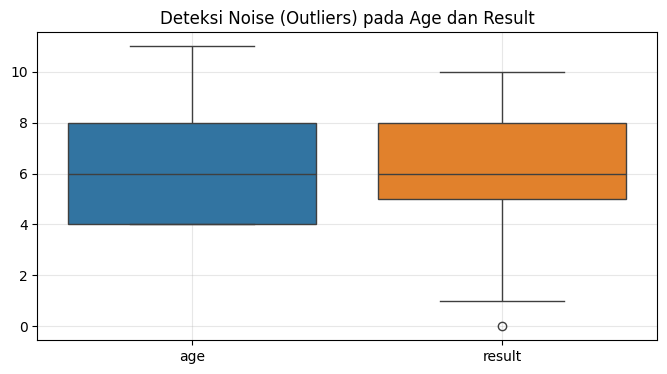

Ringkasan Statistik (Age & Result):
              age      result
count  290.000000  290.000000
mean     6.362069    6.234483
std      2.352193    2.290385
min      4.000000    0.000000
25%      4.000000    5.000000
50%      6.000000    6.000000
75%      8.000000    8.000000
max     11.000000   10.000000


In [16]:
# Deteksi outliers
plt.figure(figsize=(8, 4))

cols_to_check = ['age', 'result']

sns.boxplot(data=df[cols_to_check])
plt.title("Deteksi Noise (Outliers) pada Age dan Result")
plt.grid(True, alpha=0.3)
plt.show()

# Ringkasan statistik
print("Ringkasan Statistik (Age & Result):")
print(df[cols_to_check].describe())

In [17]:
# Handling outliers dengan median
kolom_outlier = "result"

Q1 = df[kolom_outlier].quantile(0.25)
Q3 = df[kolom_outlier].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

median_value = df[kolom_outlier].median()

# Replace outliers
df[kolom_outlier] = df[kolom_outlier].apply(
    lambda x: median_value if (x < lower_bound or x > upper_bound) else x
)
print("\nOutlier pada kolom", kolom_outlier, "ditangani menggunakan median.")


Outlier pada kolom result ditangani menggunakan median.


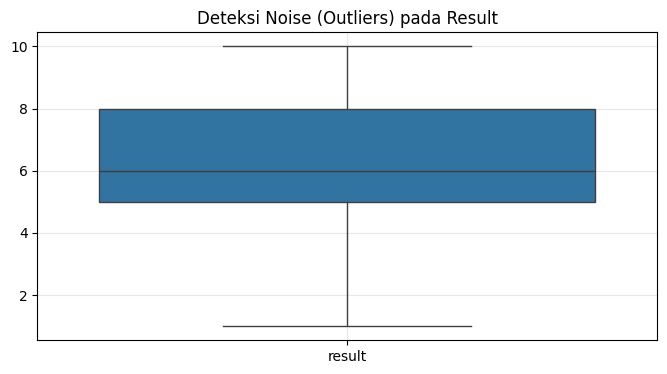

Ringkasan Statistik (Result):
           result
count  290.000000
mean     6.255172
std      2.260781
min      1.000000
25%      5.000000
50%      6.000000
75%      8.000000
max     10.000000


In [18]:
plt.figure(figsize=(8, 4))

cols_to_check = ['result']

sns.boxplot(data=df[cols_to_check])
plt.title("Deteksi Noise (Outliers) pada Result")
plt.grid(True, alpha=0.3)
plt.show()

# Ringkasan statistik
print("Ringkasan Statistik (Result):")
print(df[cols_to_check].describe())

In [19]:
# konversi ke numerik
num_cols = [
    'age',
    'result',
    'A1_Score','A2_Score','A3_Score','A4_Score','A5_Score',
    'A6_Score','A7_Score','A8_Score','A9_Score','A10_Score'
]

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Konversi ke Kategorikal

cat_cols = [
    'gender',
    'ethnicity',
    'jundice',
    'austim',
    'contry_of_res',
    'used_app_before',
    'age_desc',
    'relation',
    'Class/ASD'
]

for col in cat_cols:
    df[col] = df[col].astype('category')


print(df.dtypes)

A1_Score            float64
A2_Score            float64
A3_Score            float64
A4_Score            float64
A5_Score            float64
A6_Score            float64
A7_Score            float64
A8_Score            float64
A9_Score            float64
A10_Score           float64
age                 float64
gender             category
ethnicity          category
jundice            category
austim             category
contry_of_res      category
used_app_before    category
result              float64
age_desc           category
relation           category
Class/ASD          category
dtype: object


# **5.2 Feature Engineering**



In [20]:
# ==============================
# 1. Feature Engineering: Age Group
# ==============================
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 5, 10, 15, 20],
    labels=['Balita', 'Anak', 'Remaja Awal', 'Remaja']
)

# ==============================
# 2. Feature Engineering: Total Skor (jika ingin eksplisit)
# ==============================
score_cols = [f"A{i}_Score" for i in range(1, 11)]
df['total_score'] = df[score_cols].sum(axis=1)

# ==============================
# 3. Feature Engineering: Flag Risiko Tinggi
# ==============================
df['high_risk'] = df['total_score'].apply(lambda x: 1 if x >= 7 else 0)

print(df[['age', 'age_group', 'total_score', 'high_risk']].head())


   age age_group  total_score  high_risk
0  6.0      Anak          0.0          0
1  6.0      Anak          0.0          0
2  6.0      Anak          0.0          0
3  5.0    Balita          0.0          0
4  5.0    Balita          0.0          0


In [21]:
#@title Split data

# Pisahkan fitur dan target
X = df.drop(columns=['Class/ASD'])
y = df['Class/ASD']


# SPLIT 1: Train (70%) dan Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

# SPLIT 2: Validation (15%) dan Test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    random_state=42,
    stratify=y_temp
)

# Cek hasil pembagian
print("Total data      :", df.shape)
print("Training set    :", X_train.shape)
print("Validation set  :", X_val.shape)
print("Test set        :", X_test.shape)

print("\nProporsi label:")
print("Train:\n", y_train.value_counts(normalize=True))
print("Validation:\n", y_val.value_counts(normalize=True))
print("Test:\n", y_test.value_counts(normalize=True))

Total data      : (290, 24)
Training set    : (203, 23)
Validation set  : (43, 23)
Test set        : (44, 23)

Proporsi label:
Train:
 Class/ASD
b'NO'     0.517241
b'YES'    0.482759
Name: proportion, dtype: float64
Validation:
 Class/ASD
b'NO'     0.511628
b'YES'    0.488372
Name: proportion, dtype: float64
Test:
 Class/ASD
b'NO'     0.522727
b'YES'    0.477273
Name: proportion, dtype: float64


In [24]:
print(X_train.columns)

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'age_group', 'total_score',
       'high_risk'],
      dtype='object')


In [25]:
#@title data transformation

numeric_cols = ['total_score']

categorical_cols = [
    'age_group',
    'gender',
    'ethnicity',
    'jundice',
    'austim',
    'contry_of_res',
    'used_app_before',
    'relation'
]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed   = preprocessor.transform(X_val)
X_test_transformed  = preprocessor.transform(X_test)

print("Train:", X_train_transformed.shape)
print("Val  :", X_val_transformed.shape)
print("Test :", X_test_transformed.shape)

Train: (203, 68)
Val  : (43, 68)
Test : (44, 68)


# **6. MODELING**

Accuracy : 0.5348837209302325

Classification Report (Ringkas):
              precision    recall  f1-score   support

       b'NO'       0.54      0.59      0.57        22
      b'YES'       0.53      0.48      0.50        21

    accuracy                           0.53        43
   macro avg       0.53      0.53      0.53        43
weighted avg       0.53      0.53      0.53        43



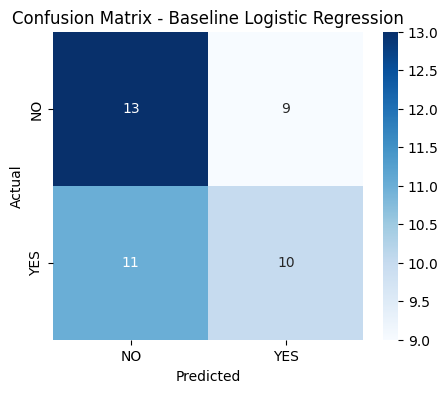

In [26]:
# model Logistic Regression

# 1. Train Model (Baseline)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_transformed, y_train)

# 2. Prediksi Validation Set
y_val_pred = model.predict(X_val_transformed)

# 3. Evaluasi Metrik Penting
print("Accuracy :", accuracy_score(y_val, y_val_pred))
print("\nClassification Report (Ringkas):")
print(classification_report(y_val, y_val_pred))

# 4. Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['NO', 'YES'],
            yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Baseline Logistic Regression')
plt.show()

Accuracy : 0.6046511627906976

Classification Report (Ringkas):
              precision    recall  f1-score   support

       b'NO'       0.60      0.68      0.64        22
      b'YES'       0.61      0.52      0.56        21

    accuracy                           0.60        43
   macro avg       0.61      0.60      0.60        43
weighted avg       0.61      0.60      0.60        43



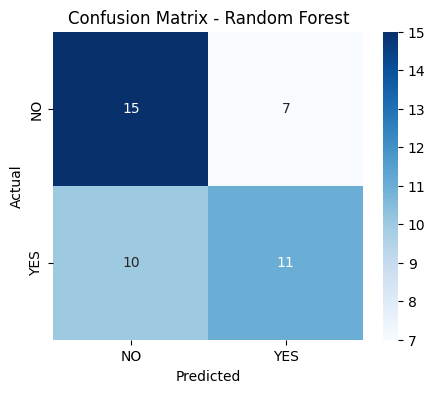

In [27]:
# Model Random Forest

# ==============================
# 1. Train Model (Random Forest)
# ==============================
rf_model = RandomForestClassifier(
    n_estimators=100,      # jumlah pohon (cukup, tidak berlebihan)
    max_depth=10,          # batasi kedalaman → cegah overfitting
    min_samples_split=5,   # minimal data untuk split
    random_state=42
)

rf_model.fit(X_train_transformed, y_train)

# ==============================
# 2. Prediksi Validation Set
# ==============================
y_val_pred_rf = rf_model.predict(X_val_transformed)

# ==============================
# 3. Evaluasi Metrik Penting
# ==============================
print("Accuracy :", accuracy_score(y_val, y_val_pred_rf))
print("\nClassification Report (Ringkas):")
print(classification_report(y_val, y_val_pred_rf))

# ==============================
# 4. Confusion Matrix
# ==============================
cm = confusion_matrix(y_val, y_val_pred_rf)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['NO', 'YES'],
    yticklabels=['NO', 'YES']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [35]:
df.dtypes

,0
A1_Score,float64
A2_Score,float64
A3_Score,float64
A4_Score,float64
A5_Score,float64
A6_Score,float64
A7_Score,float64
A8_Score,float64
A9_Score,float64
A10_Score,float64


In [39]:
!pip install tensorflow

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 529ms/step - accuracy: 0.5122 - auc: 0.5084 - loss: 0.7081 - val_accuracy: 0.4651 - val_auc: 0.5195 - val_loss: 0.6926
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5279 - auc: 0.5343 - loss: 0.6966 - val_accuracy: 0.5116 - val_auc: 0.5519 - val_loss: 0.6885
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6088 - auc: 0.5913 - loss: 0.6825 - val_accuracy: 0.5581 - val_auc: 0.5584 - val_loss: 0.6863
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.6289 - auc: 0.6619 - loss: 0.6600 - val_accuracy: 0.5116 - val_auc: 0.5952 - val_loss: 0.6846
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.6362 - auc: 0.6894 - loss: 0.6528 - val_accuracy: 0.5116 - val_auc: 0.5996 - val_loss: 0.6841
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6095 - auc: 0.6472 - loss: 0.6629 - val_accuracy: 0.5814 - val_auc: 0.6017 - val_loss: 0.6813
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accura

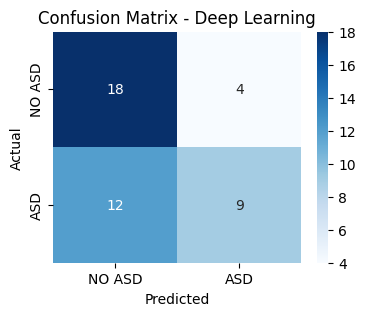

In [40]:
from tensorflow import keras
from tensorflow.keras import layers
# ==============================
# 1. PERSIAPAN DATA (WAJIB)
# ==============================

# X: sparse -> dense
X_train_processed = X_train_transformed.toarray().astype('float32')
X_val_processed   = X_val_transformed.toarray().astype('float32')

# y: category -> 0 / 1
y_train_processed = y_train.cat.codes.astype('int32')
y_val_processed   = y_val.cat.codes.astype('int32')

# Input dimension
input_dim = X_train_processed.shape[1]

# ==============================
# 2. EARLY STOPPING
# ==============================
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# ==============================
# 3. MODEL MLP (SEDERHANA & AMAN)
# ==============================
model_deep_learning = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# ==============================
# 4. COMPILE MODEL
# ==============================
model_deep_learning.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.AUC(name='auc')]
)

# ==============================
# 5. TRAINING
# ==============================
history = model_deep_learning.fit(
    X_train_processed, y_train_processed,
    epochs=10,
    batch_size=32,
    validation_data=(X_val_processed, y_val_processed),
    callbacks=[early_stopping],
    verbose=1
)

# ==============================
# 6. CONFUSION MATRIX (VALIDATION)
# ==============================
y_val_pred = (model_deep_learning.predict(X_val_processed) > 0.5).astype(int)

cm = confusion_matrix(y_val_processed, y_val_pred);

plt.figure(figsize=(4, 3))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['NO ASD', 'ASD'],
    yticklabels=['NO ASD', 'ASD']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Deep Learning')
plt.show()

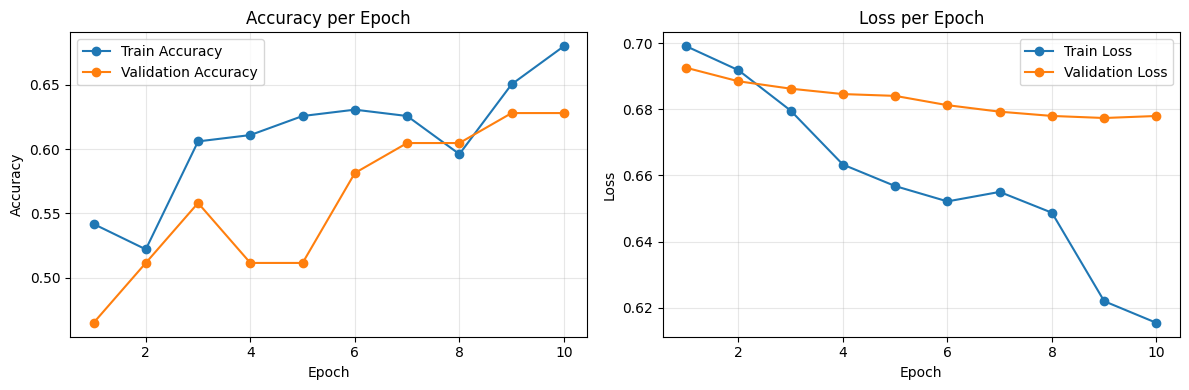

In [42]:
# ==============================
# Ambil data dari history
# ==============================
epochs = range(1, len(history.history['accuracy']) + 1)

train_acc = history.history['accuracy']
val_acc   = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss   = history.history['val_loss']

# ==============================
# Visualisasi
# ==============================
plt.figure(figsize=(12, 4))

# ---- Accuracy ----
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, marker='o', label='Train Accuracy')
plt.plot(epochs, val_acc, marker='o', label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# ---- Loss ----
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, marker='o', label='Train Loss')
plt.plot(epochs, val_loss, marker='o', label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [43]:
model_deep_learning.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │         8,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,461 (201.02 KB)

 Trainable params: 17,153 (67.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,308 (134.02 KB)

# **7. EVALUATION**

In [50]:
#@title Baseline Logistic Regression

y_test_pred_lr = model.predict(X_test_transformed)
y_test_proba_lr = model.predict_proba(X_test_transformed)[:, 1]

print("ROC AUC:", roc_auc_score(y_test, y_test_proba_lr))
print("Classification Report - Logistic Regression (Test Set)")
print(classification_report(y_test, y_test_pred_lr))

ROC AUC: 0.5269151138716356
Classification Report - Logistic Regression (Test Set)
              precision    recall  f1-score   support

       b'NO'       0.55      0.52      0.53        23
      b'YES'       0.50      0.52      0.51        21

    accuracy                           0.52        44
   macro avg       0.52      0.52      0.52        44
weighted avg       0.52      0.52      0.52        44



In [57]:
#@title model Random Forest


y_val_pred_rf = rf_model.predict(X_val_transformed)
y_val_proba_rf = rf_model.predict_proba(X_val_transformed)[:, 1]

print("ROC-AUC: ", roc_auc_score(y_val, y_val_proba_rf))
print("Classification Report - Random Forest (Validation Set)")
print(classification_report(y_val, y_val_pred_rf))

ROC-AUC:  0.5757575757575758
Classification Report - Random Forest (Validation Set)
              precision    recall  f1-score   support

       b'NO'       0.60      0.68      0.64        22
      b'YES'       0.61      0.52      0.56        21

    accuracy                           0.60        43
   macro avg       0.61      0.60      0.60        43
weighted avg       0.61      0.60      0.60        43



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
ROC-AUC:  0.6255411255411255

Classification Report - Deep Learning (Validation Set)
              precision    recall  f1-score   support

           0       0.60      0.82      0.69        22
           1       0.69      0.43      0.53        21

    accuracy                           0.63        43
   macro avg       0.65      0.62      0.61        43
weighted avg       0.65      0.63      0.61        43



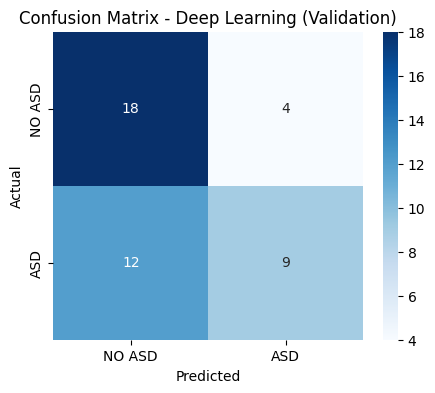

In [69]:
#@title model Deep Learning

# y_val_processed now holds predicted probabilities (continuous)
predicted_probabilities = model_deep_learning.predict(X_val_processed).flatten()
# y_val_pred_dl holds predicted binary labels
y_val_pred_dl = (predicted_probabilities > 0.5).astype(int)

# True labels for validation set (binary)
true_y_val = y_val.cat.codes

print("ROC-AUC: ", roc_auc_score(true_y_val, predicted_probabilities))
print("\nClassification Report - Deep Learning (Validation Set)")
print(classification_report(true_y_val, y_val_pred_dl))

cm_dl = confusion_matrix(true_y_val, y_val_pred_dl)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm_dl,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['NO ASD', 'ASD'],
    yticklabels=['NO ASD', 'ASD']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Deep Learning (Validation)')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
                     Accuracy  F1 Score
Model                                  
Logistic Regression  0.477273  0.646154
Random Forest        0.488372  0.656250
Deep Learning        0.627907  0.529412


<Figure size 800x600 with 0 Axes>

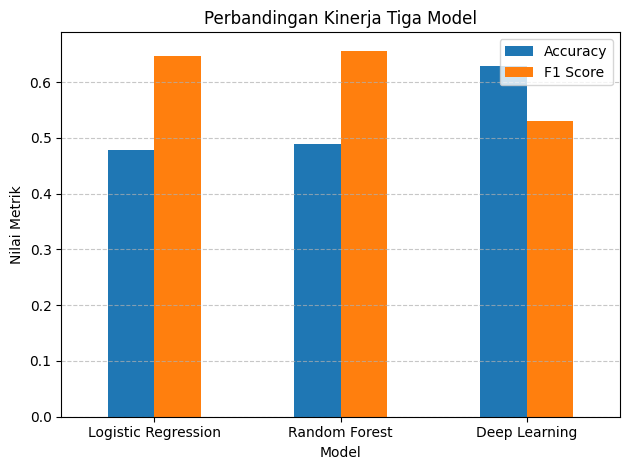

In [74]:
# ===============================
# LABEL NUMERIK (KONSISTEN)
# ===============================
y_test_num = y_test.cat.codes
y_val_num = y_val.cat.codes


# ===============================
# LOGISTIC REGRESSION (TEST)
# ===============================
y_pred_lr = np.where(
    model.predict(X_test_transformed) == b'NO', 0, 1
)

acc_lr = accuracy_score(y_test_num, y_pred_lr)
f1_lr = f1_score(y_test_num, y_pred_lr)


# ===============================
# RANDOM FOREST (VALIDATION)
# ===============================
y_pred_rf = np.where(
    rf_model.predict(X_val_transformed) == b'NO', 0, 1
)

acc_rf = accuracy_score(y_val_num, y_pred_rf)
f1_rf = f1_score(y_val_num, y_pred_rf)


# ===============================
# DEEP LEARNING (VALIDATION)
# ===============================
predicted_probabilities = model_deep_learning.predict(X_val_processed).flatten()
y_pred_dl = (predicted_probabilities > 0.5).astype(int)

acc_dl = accuracy_score(y_val_num, y_pred_dl)
f1_dl = f1_score(y_val_num, y_pred_dl)


# ===============================
# DATA HASIL EVALUASI
# ===============================
hasil = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Random Forest",
        "Deep Learning"
    ],
    "Accuracy": [
        acc_lr,
        acc_rf,
        acc_dl
    ],
    "F1 Score": [
        f1_lr,
        f1_rf,
        f1_dl
    ]
})

hasil.set_index("Model", inplace=True)
print(hasil)


# ===============================
# VISUALISASI BAR CHART
# ===============================
plt.figure(figsize=(8, 6))
hasil.plot(kind="bar")
plt.title("Perbandingan Kinerja Tiga Model")
plt.ylabel("Nilai Metrik")
plt.xlabel("Model")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()